# Estudio de Recency en demoras y duración de las sanciones.

__Autores:__ Gina La Hera Fuentes, Gabriel Moyocoyani Molina Espíritu, Wayra Paz, Monserrat López 

En este paso posterior, se tomó el dataset limpiado previamente. Este nuevo dataset contiene una extensión de los atributos que ayudó para el estudio previo; y limpieza de variables que no se registraron adecuadamente. Por otra parte, contiene una categorización de las dependencias. Esto último para facilitar su visualización y manejo en el análisis.

Con esta información en mano, se pretende evaluar la temporalidad de las sanciones a través de una pequeña aplicación del feature enginering y la comparación de dos distribuciones temporales.

Para ello se requieren las siguientes librerías.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

y abrir el dataset previamente tratado

In [3]:
def openDataset_csv(filename):
    try:
        df = pd.read_csv(filename,encoding='latin1',
                         error_bad_lines=False)
        #df.drop(['sample', 'node1','node2','node3',
        #         'node4','node5','node6','node7',
        #         'index','Unnamed: 0'], axis = 1, inplace = True)
        print("El dataset tiene {} muestras con {} atributos.".format(*df.shape))
        return df
    except:
        print("Dataset could not be loaded. Is the dataset missing?")   

df = openDataset_csv('./database.csv')
df.head(8)

El dataset tiene 2444 muestras con 31 atributos.


,expediente,fechaderesolucin,servidorpblico,autoridad,dependencia,sancinimpuesta,inicio,fin,monto,v11,...,anio2011,anio2012,anio2013,anio2014,anio2015,anio2016,anio2017,anio2018,duracion,dependencia2
0,000001/2018,2018-07-31,RAUL CARDOSO MONTILLA,ORGANO INTERNO DE CONTROL,INSTITUTO MEXICANO DEL PETROLEO,INHABILITACION ...,2018-08-02,2019-02-02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,PEMEX
1,000003/2016,2018-08-17,CIRILO VICTORIA RODRIGUEZ,ORGANO INTERNO DE CONTROL,INSTITUTO NACIONAL DE PEDIATRIA,INHABILITACION ...,2018-08-31,2023-08-31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6,INSTITUTOS
2,000003/2016,2018-08-17,GABRIEL DELGADO VALDIVIESO,ORGANO INTERNO DE CONTROL,INSTITUTO NACIONAL DE PEDIATRIA,INHABILITACION ...,2018-08-29,2023-08-29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6,INSTITUTOS
3,000004/2017,2018-11-14,ROBERTO MANUEL REYES GRANADOS,ORGANO INTERNO DE CONTROL,TALLERES GRAFICOS DE MEXICO,INHABILITACION ...,2018-11-27,2028-11-27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11,OTROS
4,000004/2018,2018-09-07,NAYELY YOLOTZIN CEDILLO NAJERA,ORGANO INTERNO DE CONTROL,INSTITUTO NACIONAL DE CANCEROLOGIA,INHABILITACION ...,2018-09-07,2018-12-07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,INSTITUTOS
5,000004/2018,2018-11-14,EDUARDO ARCINIEGA VAZQUEZ,ORGANO INTERNO DE CONTROL,CENTRO DE ENSENANZA TECNICA INDUSTRIAL,INHABILITACION ...,2018-11-15,2019-08-14,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,CENTROS
6,000005/2017,2018-09-21,EDUARDO ROMERO MONDRAGON,ORGANO INTERNO DE CONTROL,INSTITUTO MEXICANO DEL SEGURO SOCIAL (IMSS),INHABILITACION ...,2018-09-26,2018-12-26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,INSTITUTOS
7,000005/2017,2018-09-21,IRMA ESTELA CEDILLO CRUZ,ORGANO INTERNO DE CONTROL,INSTITUTO MEXICANO DEL SEGURO SOCIAL (IMSS),INHABILITACION ...,2018-09-26,2018-12-26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,INSTITUTOS


# Demora en el proceso de las sanciones.


## ¿Cuánto tiempo transcurre entre la fecha de resolución y la fecha de inicio?
Se pretende encontrar un patrón o indicador que nos permita relacionar las dependencias, autoridades y servidores púlicos a través de que tanto se demora en iniciar una sanción.

Para analizar esa relación entre fechas se requiere ignorar aquellos campos que no contienen valor de fecha:

In [7]:
from datetime import datetime

df_tempo = df.loc[df['inicio']!='--']
startDate=df_tempo['fechaderesolucin'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
endDate=df_tempo['inicio'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

df_tempo['DemoraSancion']=endDate-startDate

Se han encontrado valores negativos. Suponemos que no puede ser plausible que exista una fecha de resolución menor a una fecha de inicio de la sanción, por lo que decidimos eliminar esos valores del análisis (mostrados en rojo en la siguiente gráfica).

(0, 10)

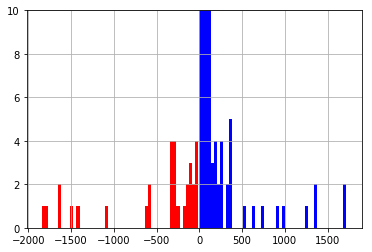

In [13]:
df_tempo.loc[df_tempo['DemoraSancion'].dt.days<0]['DemoraSancion'].dt.days.hist(bins=50,color='red')
df_tempo.loc[df_tempo['DemoraSancion'].dt.days>0]['DemoraSancion'].dt.days.hist(bins=50,color='blue')
plt.ylim(0,10)

In [15]:
print(len(df_tempo.loc[df_tempo['DemoraSancion'].dt.days <0]),'valores negativos')

31 valores negativos


Sobreescribiendo el dataset para quedarse únicamente con valoes positivos.

In [16]:
df_tempo =df_tempo.loc[df_tempo['DemoraSancion'].dt.days>=0]

El siguiente paso es analizar los límites de la distribución

In [18]:
print(df_tempo['DemoraSancion'].describe())

count                       2413
mean     15 days 13:48:54.604227
std      81 days 07:41:26.846614
min              0 days 00:00:00
25%              1 days 00:00:00
50%              5 days 00:00:00
75%             11 days 00:00:00
max           1720 days 00:00:00
Name: DemoraSancion, dtype: object


Esto asemeja una distribución asimétrica (con kurtosis), por lo que la estadística descriptiva se basará en parámetros rígidos, como la mediana y los percentiles

(0, 40)

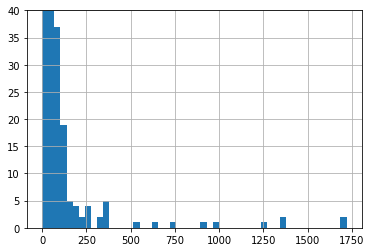

In [19]:
df_tempo['DemoraSancion'].dt.days.hist(bins=50)
plt.ylim(0,40)

Analizando posibles outliers

In [21]:
IQR = df_tempo['DemoraSancion'].quantile(0.75) - df_tempo['DemoraSancion'].quantile(0.25)
IQR_1_5 = IQR + IQR/2
print(IQR_1_5)

15 days 00:00:00


A partir del IQR 1.5 se puede separar entre outliers y valores "normales" de la resta entre fecha de resolucion y fecha inicial, que en este caso son valores superiores a los 15 días.

Se van a separar los datasets de datos normales y outliers. Podrían requerirse para un análisis posterior.

In [22]:
df_normalResolucionInicial = df_tempo.loc[df_tempo['DemoraSancion'].dt.days<=15]
df_outliersResolucionInicial = df_tempo.loc[df_tempo['DemoraSancion'].dt.days>15]

Es posible visualizar si existen diferencias entre los outliers y los datos normales

In [26]:
print(df_outliersResolucionInicial.groupby('autoridad').size().sort_values(ascending=False))
print('***********')
print(df_outliersResolucionInicial.groupby('causa_clean').size().sort_values(ascending=False))
print('******************')
print(df_outliersResolucionInicial.groupby('dependencia').size().sort_values(ascending=False))

autoridad
ORGANO INTERNO DE CONTROL    247
dtype: int64
***********
causa_clean
NEGLIGENCIA ADMINISTRATIVA                                172
VIOLACION LEYES Y NORMATIVIDAD                             21
ABUSO DE AUTORIDAD                                         16
COHECHO O EXTORSION                                        13
INCUMPLIMIENTO EN DECLARACION DE SITUACION PATRIMONIAL     12
VIOLACION PROCEDIMIENTOS DE CONTRATACION                    8
OTRAS                                                       3
VIOLACIîN A LOS DERECHOS HUMANOS                            2
dtype: int64
******************
dependencia
SUPERISSSTE                                                                     22
PREVENCION Y READAPTACION SOCIAL                                                21
FIDEICOMISO FONDO NACIONAL DE HABITACIONES POPULARES                            20
SECRETARIA DE MEDIO AMBIENTE Y RECURSOS NATURALES                               20
COMISION FEDERAL DE ELECTRICIDAD                

In [30]:
print(df_normalResolucionInicial.groupby('autoridad').size().sort_values(ascending=False))
print('***********')
print(df_normalResolucionInicial.groupby('causa_clean').size().sort_values(ascending=False))
print('******************')
print(df_normalResolucionInicial.groupby('dependencia').size().sort_values(ascending=False))

autoridad
ORGANO INTERNO DE CONTROL                                               2130
DIRECCION GENERAL DE RESPONSABILIDADES Y SITUACION PATRIMONIAL (SFP)      27
SFP (CONTRALORIA INTERNA)                                                  8
SECRETARIA DE LA FUNCION PUBLICA                                           1
dtype: int64
***********
causa_clean
NEGLIGENCIA ADMINISTRATIVA                                   1239
ABUSO DE AUTORIDAD                                            254
INCUMPLIMIENTO EN DECLARACION DE SITUACION PATRIMONIAL        242
VIOLACION LEYES Y NORMATIVIDAD                                151
VIOLACION PROCEDIMIENTOS DE CONTRATACION                       99
COHECHO O EXTORSION                                            84
EJERCICIO INDEBIDO DE SUS FUNCIONES EN MATERIA MIGRATORIA      64
OTRAS                                                          31
VIOLACIîN A LOS DERECHOS HUMANOS                                2
dtype: int64
******************
dependencia
POLICIA

Al parecer, cuando se considera la demora en la sanción, si hay diferencias casi notorias entre las dependencias. Por ejemploLa policía Federal y el IMSS son muy recurrentes en sanciones con una alta demora.

Ahora vamos a ver que ocurre con la duración de las sensaciones

# Duración de las sanciones.

## ¿Cuánto tiempo transcurre entre la fecha de inicio y la fecha final de una sanción?

A través de esta métrica propuesta se podrá indagar si hay sanciones que tardan demasiado en cumplirse, y como se comparan en relación con aquellos que no son tardadas.

In [31]:
startDate=df_tempo['inicio'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
endDate=df_tempo['fin'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

df_tempo['DuracionSancion']=endDate-startDate

(0, 200)

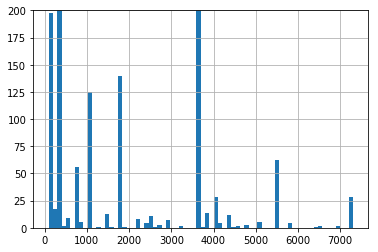

In [32]:
day2yrs = 1/365.2425
df_tempo['DuracionSancion'].dt.days.hist(bins=70)
plt.ylim(0,200)

La distribución de este producto de un proceso de feature enginerrig nos muestra una distribución poco convencional.

Es dudoso poder aseverar que una estadística descriptiva es capaz de captar tal complejidad (registros muy pronunciados, y alejados entre sí).

Observemos su descripción estadística

In [34]:
df_tempo['DuracionSancion'].describe()

count                         2413
mean     2688 days 21:31:24.293410
std      1618 days 04:15:08.336286
min               90 days 00:00:00
25%             1094 days 00:00:00
50%             3649 days 00:00:00
75%             3649 days 00:00:00
max             7304 days 00:00:00
Name: DuracionSancion, dtype: object

Algo que nos permite reafirmar que la descripción estadística no engloba semejante complejidad, es el hecho de que el Q3 y Q2 caen en el mismo número de días, por lo que habrá que buscar otra forma de proceder.

# Recency Analysis.

A partir de las dos métricas creadas, se puede buscar si existe alguna relación entre lo que se demora una sanción en iniciarse, y lo que dura la sanción.

Para ello hay que considerar que ambas distribuciones no son gaussianas, y sus valores distan mucho entre sí.

Este problema podría abordarse bajo una transformación Boxcox o Yeo-Johnson. Sin embargo, por cuestiones de tiempo, haremos una aproximación más sencilla y más fácil de comprender.

Vamos a proyectar cada feature nueva en una transformación basada en sus quintiles (dividir su distribución en 5 percentiles, o Q5i para referecirse al i-ésimo quintil); de esta manera tendremos una distribución acotada entre 0 y 1, y segmentada en 5 partes. Cada parte nos dará un indicio de que tan rápido o que tanto se tarda en concretarse una sanción, y que tanto se demora en iniciarse una sanción.

Estas cinco categorías podemos clasificarlas, arbitrariamente bajo las siguientes etiquetas:
- rápido: $Q5_1$
- moderado: $Q5_2$
- medio: $Q5_3$
- lento: $Q5_4$
- eterno: $Q5_5$

Para esta trnsformación ocuparemos la función quantile_transform de la librería scikit learn

In [36]:
import numpy as np
from sklearn.preprocessing import quantile_transform
X=df_tempo[['DuracionSancion','DemoraSancion']]
X_transform=quantile_transform(X, n_quantiles=5, random_state=0)

Esa transformación luce así:

In [40]:
pd.DataFrame(X_transform).describe()

,0,1
count,2.413000e+03,2.413000e+03
mean,4.639073e-01,4.515979e-01
std,2.659662e-01,2.636645e-01
min,1.000000e-07,1.000000e-07
25%,2.500000e-01,2.500000e-01
50%,6.250000e-01,5.000000e-01
75%,6.250000e-01,7.500000e-01
max,9.999999e-01,9.999999e-01


Echando un vistazo a ese plano, y el plano original tenemos:

Text(0,0.5,'Demora en inicio de sanción')

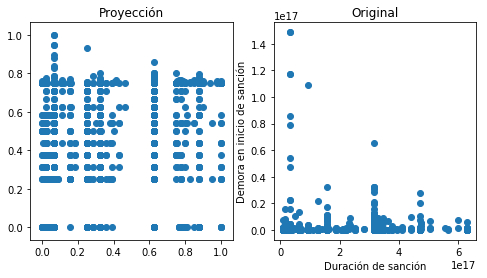

In [53]:
f, axarr = plt.subplots(1, 2,figsize=(8,4))
axarr[0].scatter(X_transform[:,0],X_transform[:,1])
axarr[0].set_title('Proyección')
axarr[1].scatter(X.DuracionSancion,X.DemoraSancion)
axarr[1].set_title('Original')
plt.xlabel('Duración de sanción')
plt.ylabel('Demora en inicio de sanción')

Evidentemente, se aprecia que el plano proyectado tiene más estructura que el plano original. 

A continuación se convierten los quintiles en los buckets descritos anteriormente.

In [54]:
buckets=[-1,0.2,0.4,0.6,0.8,9999]
labels = ['rápido','moderado','medio','lento','eterno']

df_tempo['duración de sanción']=pd.cut(X_transform[:,0], buckets, labels=labels)
df_tempo['demora en inicio de sanción']=pd.cut(X_transform[:,1], buckets, labels=labels)

Se extrae y se analiza en tableau

In [55]:
df_tempo.columns

Index(['expediente', 'fechaderesolucin', 'servidorpblico', 'autoridad',
       'dependencia', 'sancinimpuesta', 'inicio', 'fin', 'monto', 'v11',
       'cldx_fechaderesolucin', 'cldx_inicio', 'cldx_fin',
       'year_cldx_fechaderesolucin', 'year_cldx_inicio', 'year_cldx_fin',
       'cantidad', 'causa_clean', 'anio2008', 'anio2009', 'anio2010',
       'anio2011', 'anio2012', 'anio2013', 'anio2014', 'anio2015', 'anio2016',
       'anio2017', 'anio2018', 'duracion', 'dependencia2', 'DemoraSancion',
       'DuracionSancion', 'duración de sanción',
       'demora en inicio de sanción'],
      dtype='object')

In [56]:
df_tempo.to_csv('C:\\Users\\mmolina\\OneDrive\\Documentos\\alchemsp3\\Curiosidades_data\\dataton anticorrupcion\\08_servidores_publicos_sancionados\\fechasEngineering_2.csv')

# Creación del dashboard.
Todavía se desconoce si se hará una especie de scrolling telling o dos dashboards independientes.

La primera parte deberá resumir parte de la historia. Para mostrar el top de causas de sanciones tiene que ser algo codificado por tamaño o por área. Se explorará con burbujas o un treemap ![](img/sketch01.png "sketch")


Para mejorar la interfaz y facilitar la manipulación de los datos se utilizará un tooltip que proyecte información exra, como las dependencias o los servidores públicos asociados con esas causas.

Para aprovechar el par de medidas creadas en la etapa de feature engineering, se creará otro dashboard interactivo donde se pueda explorar que dependencias, y que servidores públicos, se asocian con sanciones que tengan ciertas características temporales. ![](img/sketch02.png "sketch")

De esta manera, se podría averiguar que dependencias, así como servidores asociados a esas dependencias, están asociados con sanciones que tardaron poco en procesarse, así como en cumplirse; o cuales tardaron muy poco en procesarse, pero una eternidad en cumplirse. 

__Este proceso podría llevar a futuras investigaciones que, probablemente, podrían asociar esas diferencias temporales como algún factor asociado a la corrupción. ¿Porqué la media de la demora en sanciones es de 15 días?  ¿Qué hace ese tiempo se prolongué más tiempo? ¿Porqué algunas sanciones tardan menos en cumplirse? ¿Tendrá que ver la severidad de la sanción, o que el servidor público ejerce algún tipo de influencia? Esas son preguntas que pueden plantearse a manera de un estudio posterior a usar este dashboard.__

Otra cosa que se está considerando al diseñarse el dashboard es el proceso de los "visual queries". Se pretende que el usuario no pierda tanto tiempo en comenzar a usar el dashboard y siga el movimiento natural, en forma de "Z", de los ojos. Para lograr esto se pretende jugar con la posición y el diseño. La parte principal deberá resaltar de alguna forma para que el usuario comience a observar y clickear desde ahí.
![](img/sketch03.png "sketch")

# Perspectivas.
El dashboard pretende ser más del tipo exploratorio, por lo que se buscará empalmar los demás insights generados por el resto del equipo.

La idea es llegar a juntar esos insights para tener un tablero exploratorio, una aplicación basada en scrolling telling que sea explicatoria.